### Clustering Results ###
Number of clusters formed: 4
Davies-Bouldin Index (DB Index): 1.1530
Silhouette Score: 0.3932
Calinski-Harabasz Index: 80.9686


### 1. t-SNE for 2D Visualization ###
t-SNE is used to visualize high-dimensional data in 2D space. Each point represents a customer, and colors represent clusters.


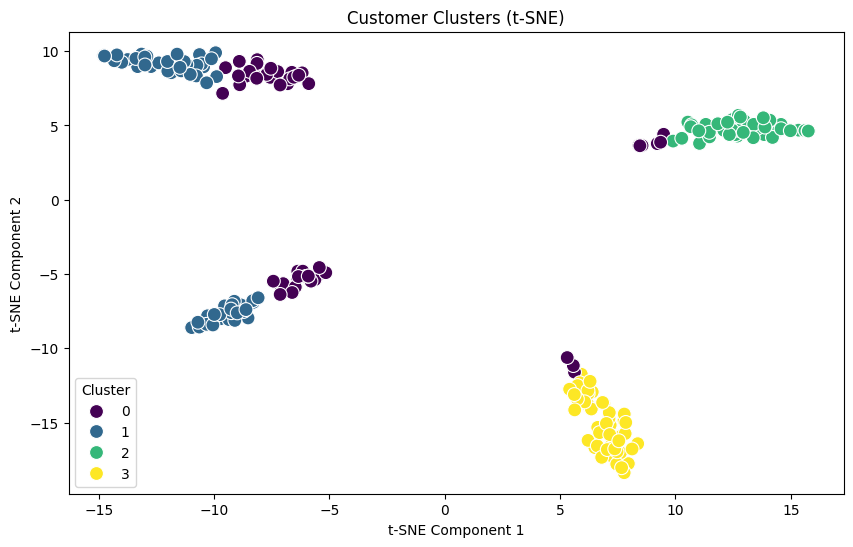


### 2. 3D Scatter Plot using t-SNE ###
This interactive 3D plot provides a more detailed view of the clusters.


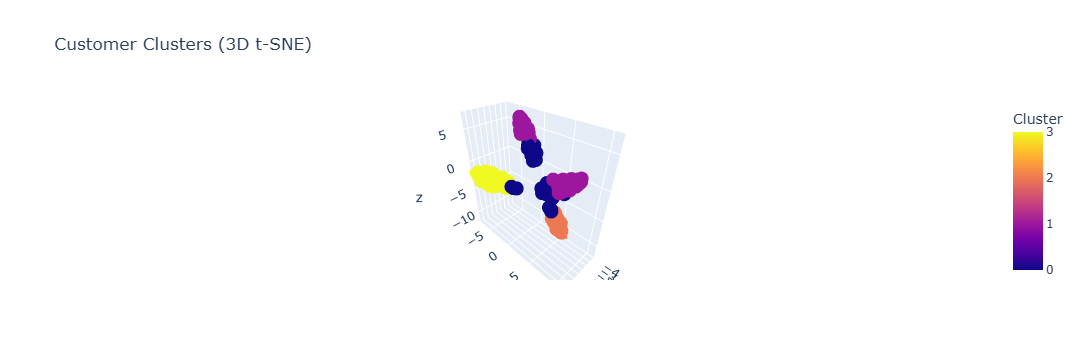


### 3. Pair Plots for Cluster Profiling ###
Pair plots show relationships between features and how clusters are distributed across these features.


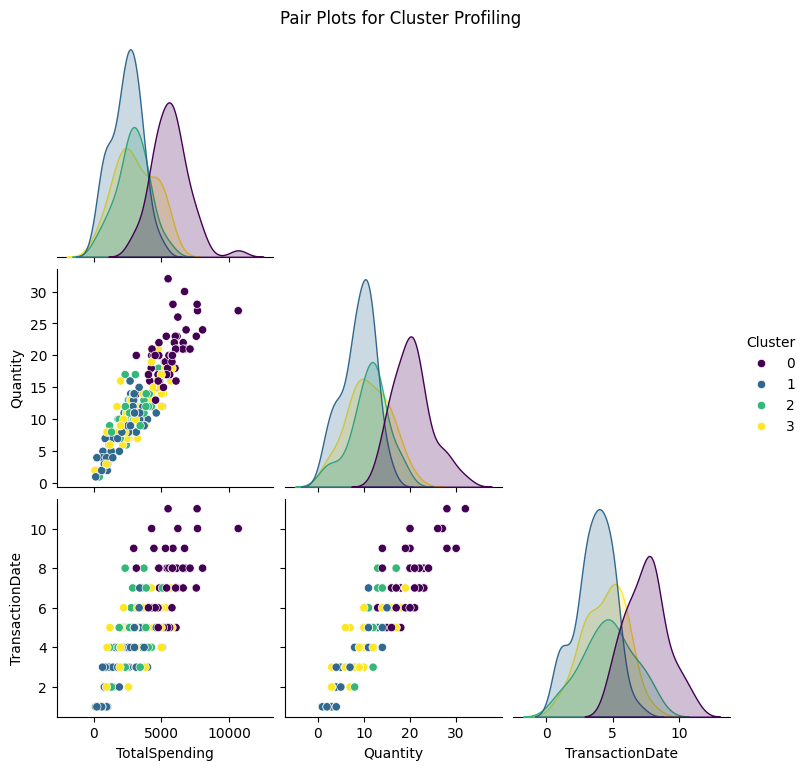


### 4. Bar Plots for Cluster Characteristics ###
Bar plots show the average values of key features (e.g., total spending) for each cluster.


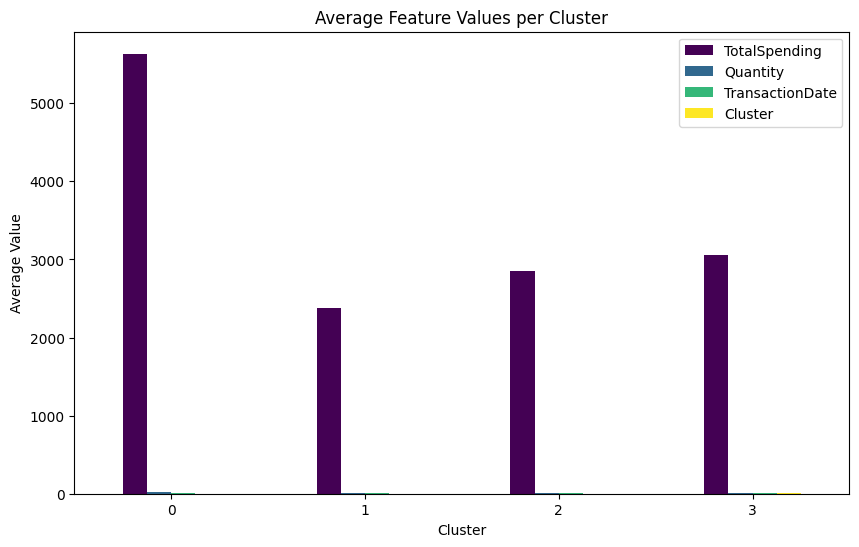


### 5. Heatmap for Categorical Variables (Region) ###
The heatmap shows the distribution of customers across regions for each cluster.


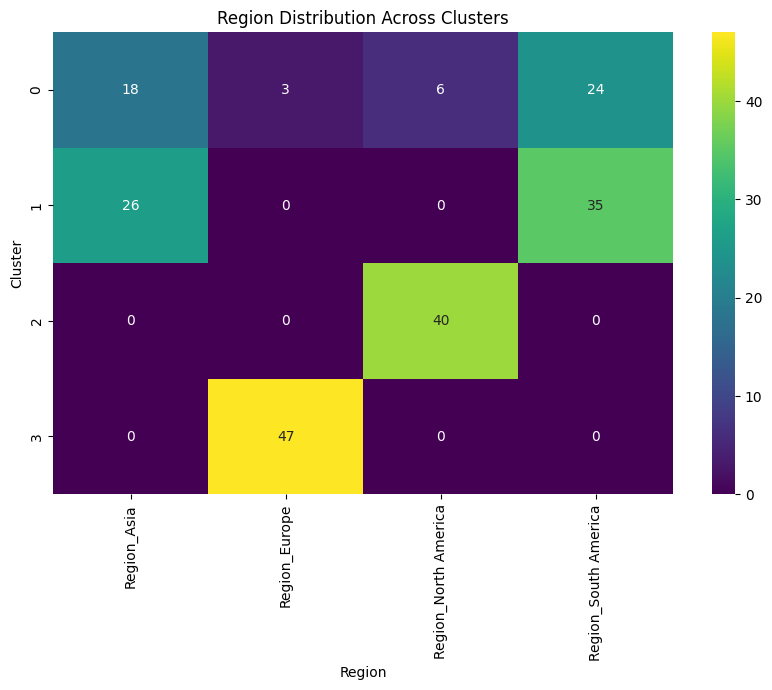

In [29]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load data
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge datasets
data = pd.merge(transactions, customers, on='CustomerID')

# Feature engineering
data['TotalSpending'] = data['Quantity'] * data['Price']
customer_data = data.groupby('CustomerID').agg({
    'TotalSpending': 'sum',
    'Quantity': 'sum',
    'TransactionDate': 'nunique'
}).reset_index()
customer_data = pd.merge(customer_data, customers, on='CustomerID')

# Encode categorical variables (e.g., Region)
customer_data = pd.get_dummies(customer_data, columns=['Region'])

# Normalize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data.drop(columns=['CustomerID', 'CustomerName', 'SignupDate']))

# Clustering
n_clusters = 4  # Number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
customer_data['Cluster'] = clusters

# Evaluate clustering
db_index = davies_bouldin_score(scaled_data, clusters)
silhouette_avg = silhouette_score(scaled_data, clusters)
calinski_harabasz = calinski_harabasz_score(scaled_data, clusters)

# Print clustering results
print("### Clustering Results ###")
print(f"Number of clusters formed: {n_clusters}")
print(f"Davies-Bouldin Index (DB Index): {db_index:.4f}")
print(f"Silhouette Score: {silhouette_avg:.4f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")
print("\n")

# Enhanced Visualizations

# 1. t-SNE for 2D Visualization
print("### 1. t-SNE for 2D Visualization ###")
print("t-SNE is used to visualize high-dimensional data in 2D space. Each point represents a customer, and colors represent clusters.")
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=clusters, palette='viridis', s=100)
plt.title('Customer Clusters (t-SNE)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()

# 2. 3D Scatter Plot using t-SNE
print("\n### 2. 3D Scatter Plot using t-SNE ###")
print("This interactive 3D plot provides a more detailed view of the clusters.")
tsne_3d = TSNE(n_components=3, random_state=42)
tsne_3d_data = tsne_3d.fit_transform(scaled_data)

fig = px.scatter_3d(
    x=tsne_3d_data[:, 0], y=tsne_3d_data[:, 1], z=tsne_3d_data[:, 2],
    color=clusters, labels={'color': 'Cluster'},
    title='Customer Clusters (3D t-SNE)'
)
fig.show()

# 3. Pair Plots for Cluster Profiling
print("\n### 3. Pair Plots for Cluster Profiling ###")
print("Pair plots show relationships between features and how clusters are distributed across these features.")
numeric_columns = customer_data.select_dtypes(include=[np.number]).columns
cluster_features = customer_data[numeric_columns]
sns.pairplot(cluster_features, hue='Cluster', palette='viridis', corner=True)
plt.suptitle('Pair Plots for Cluster Profiling', y=1.02)
plt.show()

# 4. Bar Plots for Cluster Characteristics
print("\n### 4. Bar Plots for Cluster Characteristics ###")
print("Bar plots show the average values of key features (e.g., total spending) for each cluster.")
numeric_columns = customer_data.select_dtypes(include=[np.number]).columns
cluster_means = customer_data.groupby('Cluster')[numeric_columns].mean()

# Plot the bar plot
cluster_means.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Average Feature Values per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.show()

# 5. Heatmap for Categorical Variables (Region)
print("\n### 5. Heatmap for Categorical Variables (Region) ###")
print("The heatmap shows the distribution of customers across regions for each cluster.")
region_columns = [col for col in customer_data.columns if col.startswith('Region_')]
cluster_region = customer_data.groupby('Cluster')[region_columns].sum()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_region, annot=True, fmt='d', cmap='viridis')
plt.title('Region Distribution Across Clusters')
plt.xlabel('Region')
plt.ylabel('Cluster')
plt.show()